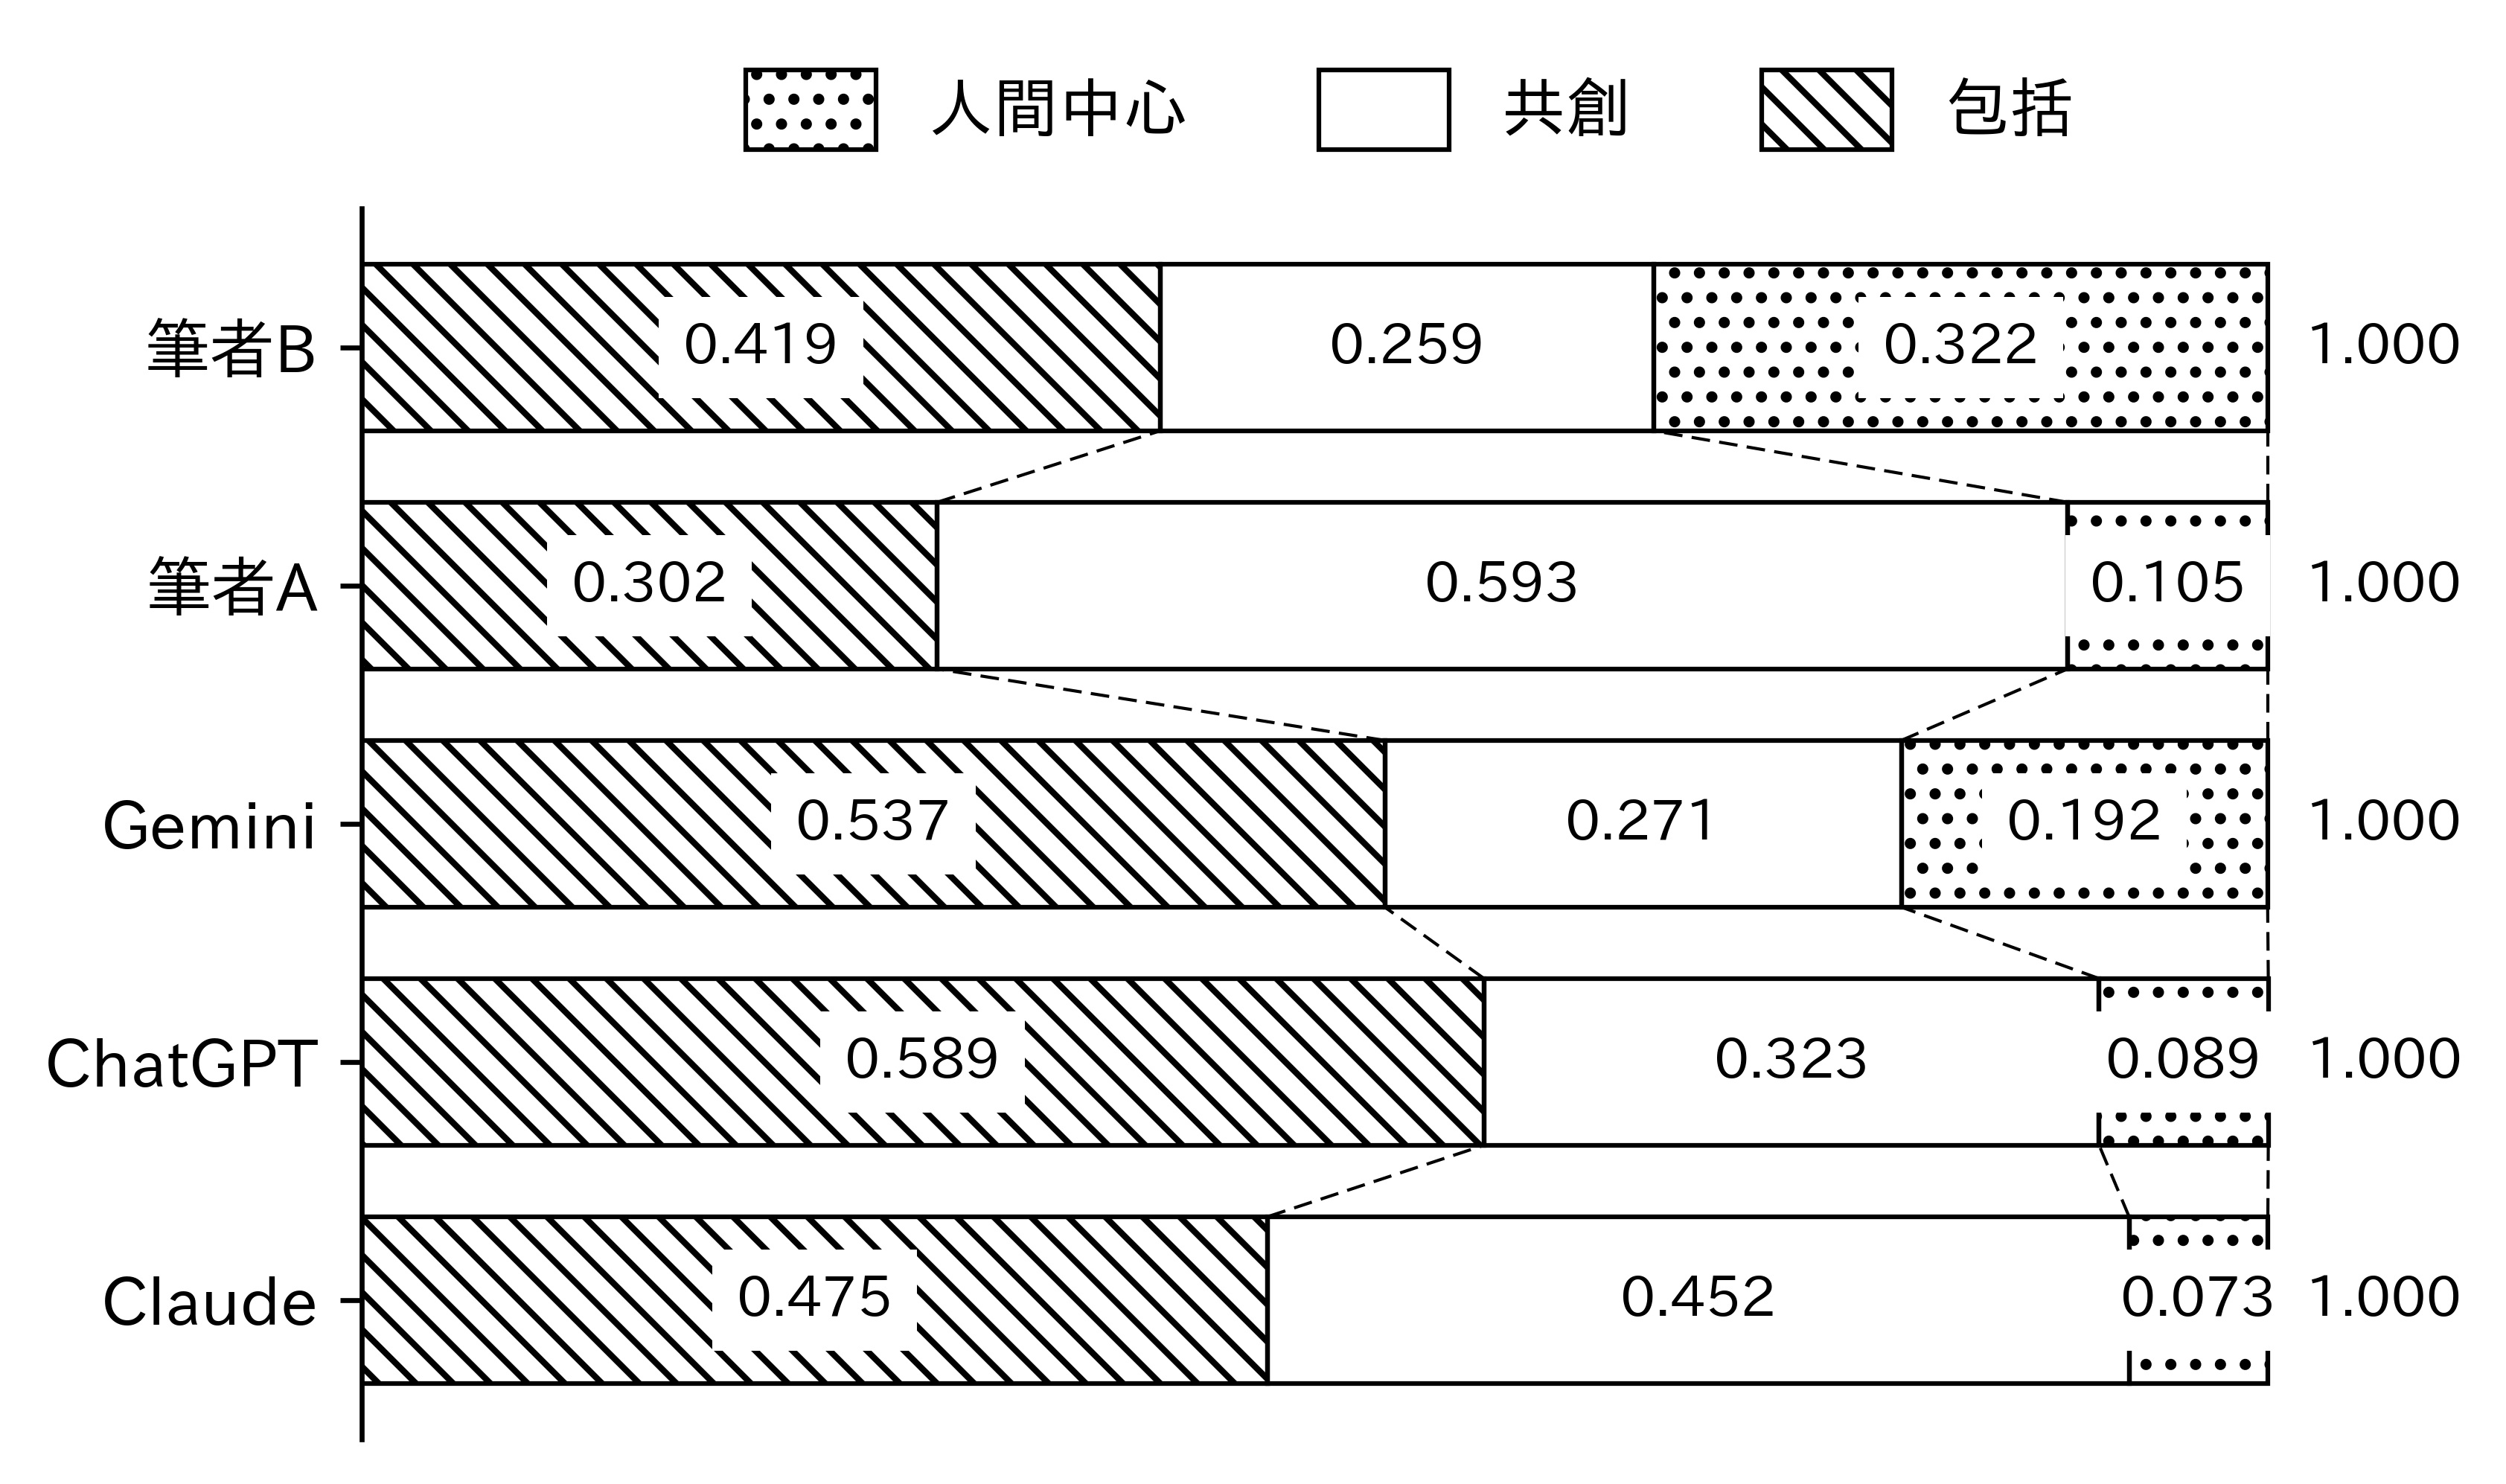

In [6]:
import numpy as np
import pandas as pd
from decimal import Decimal, ROUND_HALF_UP
from matplotlib import pyplot as plt
import japanize_matplotlib

def get_data():
    t_claude = []
    t_chatgpt = []
    t_gemini = []
    n = 3
    for i in range(n):
        t_claude = np.array([
            np.sum([0.075465, 0.065703, 0.077253]) / n,  # 人間中心
            np.sum([0.41205, 0.651184, 0.292596]) / n,   # 共創
            np.sum([0.512485, 0.283113, 0.63046]) / n    # 包括
        ])
        t_chatgpt = np.array([
            np.sum([0.064636, 0.105105, 0.096486]) / n,
            np.sum([0.283802, 0.420849, 0.263418]) / n,
            np.sum([0.651562, 0.475046, 0.640096]) / n
        ])
        t_gemini = np.array([
            np.sum([0.105, 0.36658, 0.105]) / n,
            np.sum([0.258, 0.297, 0.258]) / n,
            np.sum([0.637, 0.33642, 0.637]) / n
        ])
        data = np.array(
            [t_claude, t_chatgpt, t_gemini, [0.105, 0.593, 0.302], [0.322, 0.259, 0.419]]
        )
        row_labels = ["Claude", "ChatGPT", "Gemini", "筆者A", "筆者B"]
        col_labels = ["人間中心", "共創", "包括"]
        return pd.DataFrame(data, index=row_labels, columns=col_labels)

df = get_data()

# normalization (no need for AHP)
# df = df.div(df.sum(axis=1), axis=0)

# Reverse the order of columns
df = df.iloc[:, ::-1]

n_rows, n_cols = df.shape
positions = np.arange(n_rows)
offsets = np.zeros(n_rows, dtype=df.values.dtype)
hatchlist = ["\\\\\\\\", "", "..."]  # Reversed order to match the new column order

# Change figure size to accommodate horizontal bars
fig, ax = plt.subplots(figsize=(6, 3.708), dpi=600, facecolor="w", linewidth=0, edgecolor="w")

# Set y-ticks (previously x-ticks)
ax.set_yticks(positions)
ax.set_yticklabels(df.index, fontsize=10.5)
ax.set_xticks([])

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.rcParams.update({'font.size': 10.5})

bars = []
for i in range(len(df.columns)):
    # Use barh instead of bar for horizontal bars
    bar = ax.barh(positions, df.iloc[:, i], left=offsets, hatch=hatchlist[i], 
                  color="none", edgecolor="k", label=df.columns[i], height=.7, linewidth=.75)
    bars.append(bar)
    offsets += df.iloc[:, i]
    
    # Adjust text position for horizontal bars
    for rect, value in zip(bar, df.iloc[:, i]):
        cy = rect.get_y() + rect.get_height() / 2
        cx = rect.get_x() + rect.get_width() / 2
        t = ax.text(cx, cy, f"{Decimal(value).quantize(Decimal('0.001'), rounding=ROUND_HALF_UP)}", 
                   color="k", ha="center", va="center", fontsize=9)
        t.set_bbox(dict(facecolor='white', alpha=1, linewidth=0))

# Display total values to the right of the bars
for i, total in enumerate(df.sum(axis=1)):
    ax.text(total + 0.02, i, f"{Decimal(total).quantize(Decimal('0.001'), rounding=ROUND_HALF_UP)}", 
            ha='left', va='center', fontsize=9)

# Reverse the order of bars for the legend
bars.reverse()
labels = df.columns[::-1]

# Move legend to the top of the plot with reversed order
ax.legend(bars, labels, bbox_to_anchor=(0.5, 1), loc='lower center', frameon=False, handleheight=1.5, ncol=3)

# Adjust dashed lines for horizontal orientation
height = ax.patches[0].get_height()
stacks = len(ax.patches) // n_rows
for i in range(stacks):
    for j in range(0, n_rows - 1):
        w0 = np.sum([ax.patches[j + n_rows * k].get_width() for k in range(0, i + 1)])
        w1 = np.sum([ax.patches[j + 1 + n_rows * k].get_width() for k in range(0, i + 1)])
        ax.plot([w0, w1], [j + height / 2, j + 1 - height / 2], 
                color='k', ls='--', zorder=1, linewidth=.5, dashes=[6,3])

# Adjust x-axis limit
ax.set_xlim(0, max(df.sum(axis=1)) * 1.1)

# Add more padding to the layout
plt.tight_layout(pad=2.0)
plt.savefig('result.eps', format='eps', bbox_inches='tight')
plt.show()